In [53]:
#importar librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

#Importar base de datos
df = pd.read_csv("zara.csv", delimiter=";") 
print (df.head())

  Product Position Promotion Product Category Seasonal  Sales Volume  \
0            Aisle        No         Clothing       No          2823   
1            Aisle        No         Clothing       No           654   
2          End-cap       Yes         Clothing      Yes          2220   
3            Aisle       Yes         Clothing      Yes          1568   
4          End-cap        No         Clothing      Yes          2942   

                   name   price    terms section  
0   BASIC PUFFER JACKET   19.99  jackets     MAN  
1         TUXEDO JACKET  169.00  jackets     MAN  
2  SLIM FIT SUIT JACKET  129.00  jackets     MAN  
3   STRETCH SUIT JACKET  129.00  jackets     MAN  
4   DOUBLE FACED JACKET  139.00  jackets     MAN  


Este conjunto de datos de ventas de Zara contiene información sobre las ventas de productos de las tiendas Zara durante un período de tiempo específico. El conjunto de datos incluye varios atributos relevantes para las ventas, nombre del producto, categoría del producto, precio y volumen de ventas. Estos datos se pueden utilizar para analizar las tendencias de ventas de productos, el desempeño de las ventas en diferentes categorías de productos, la efectividad de las promociones, los patrones de compra de los clientes y otros factores que influyen en el desempeño de las ventas de Zara. El análisis de este conjunto de datos puede proporcionar información valiosa para la dirección de Zara a la hora de optimizar las estrategias de marketing, la gestión de inventario y otros procesos de toma de decisiones para mejorar los ingresos y la rentabilidad.

Posición del producto: la posición del producto en el catálogo o diseño de la tienda.
Promoción: Indicador de si el producto se encuentra actualmente en promoción o no.
Categoría de producto: La categoría del producto, como ropa, accesorios, zapatos, etc.
Estacional: Indicador de si el producto forma parte de una colección de temporada específica.
Volumen de Ventas: La cantidad de productos vendidos.
Nombre: Nombre del producto.
Precio: Precio del producto.
Sección: Sección o categoría donde se vende el producto en la tienda (p. ej., ropa de mujer, ropa de hombre, ropa de niño, etc.).

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product Position  252 non-null    object 
 1   Promotion         252 non-null    object 
 2   Product Category  252 non-null    object 
 3   Seasonal          252 non-null    object 
 4   Sales Volume      252 non-null    int64  
 5   name              251 non-null    object 
 6   price             252 non-null    float64
 7   terms             252 non-null    object 
 8   section           252 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 17.8+ KB


In [55]:
df.shape

(252, 9)

                                 Visualización de las variables
                                           categóricas

In [56]:
print(df.columns)

Index(['Product Position', 'Promotion', 'Product Category', 'Seasonal',
       'Sales Volume', 'name', 'price', 'terms', 'section'],
      dtype='object')


<Axes: xlabel='Product Position', ylabel='count'>

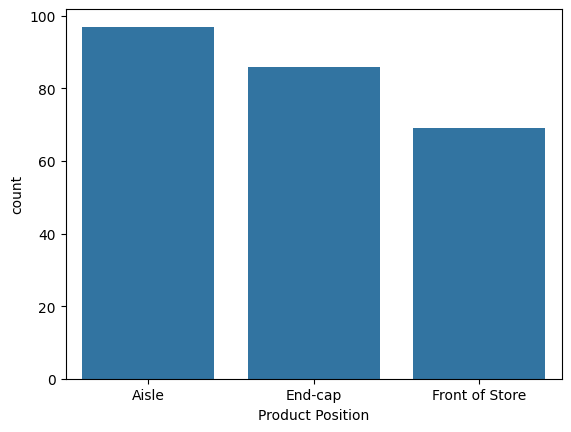

In [57]:
sns.countplot(x='Product Position',data=df)


En la anterior gráfica encontramos como se distribuyen las ventas de productos en Zara según su ubicación dentro de la tienda, teniendo en cuenta que:
- **Aisle:** Son los productos que se encuentran en el pasillo.
- **End-cap:** Son los productos en el extremo del pasillo.
- **Front of Store:** Los productos ubicados en el frente de la tienda.

A partir de esta información, podemos analizar en la gráfica que Aisle es la ubicación con las ventas más altas siendo los productos más populares entre los compradores. Esto podría deberse a la mayor visibilidad y accesibilidad de estos productos. Por otra parte, aunque las ventas de los productos End-cap son más bajas que en el pasillo, los productos en el extremo del pasillo aún tienen un buen rendimiento, estos lugares suelen ser estratégicos para destacar productos específicos o promociones. Finalmente, los productos Front of Store tienen las ventas más bajas, esto se puede dar a causa de que los compradores a menudo se dirigen directamente al pasillo o al área de interés específico en lugar de explorar el frente de la tienda.

<Axes: xlabel='Promotion', ylabel='count'>

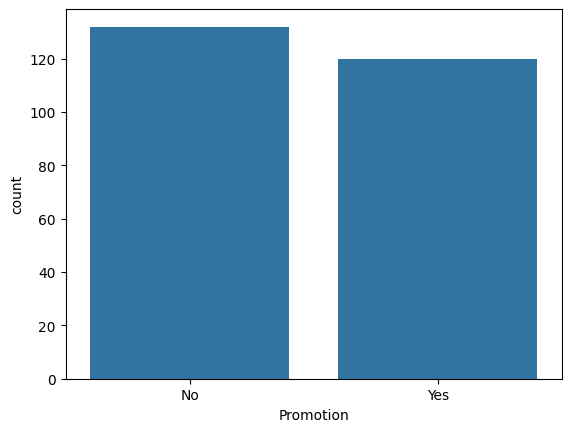

In [58]:

sns.countplot(x="Promotion",data=df)

La anterior gráfica nos muestra que la mayoría de los productos vendidos no se encontraban en promoción especifamente el 52%, sin embargo, los productos que si lo estaban no se alejan de una diferencia mínima representando el 48%. 

<Axes: xlabel='Seasonal', ylabel='count'>

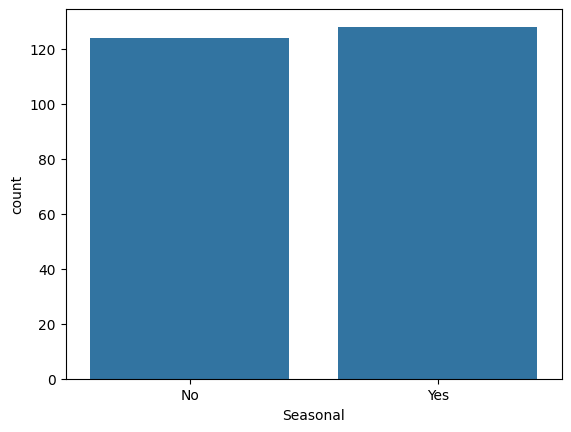

In [59]:

sns.countplot(x="Seasonal",data=df)

En la anterior gráfica podemos analizar que el 51% de las ventas se realizaron con ropa de temporada, mientras que el 49% no, esto se podría explicar gracias a que algunos países en los que se encuentra Zara, no son estacionales, así mismo, se puede explicar gracias a que los precios de las prendas que no son de temporada tienden a ser más bajos y a estar en promociones u ofertas especiales. 

<Axes: xlabel='terms', ylabel='count'>

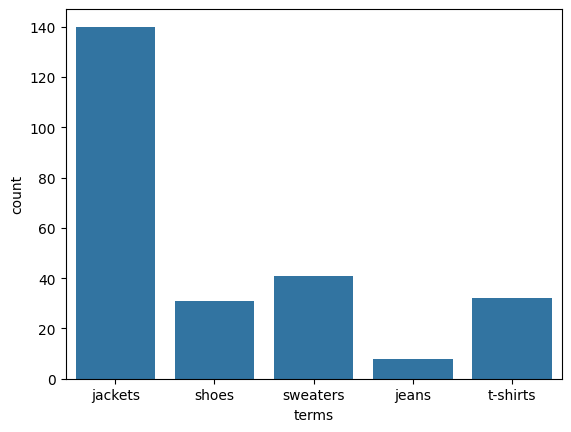

In [60]:
sns.countplot(x="terms",data=df)



 En la anterior gráfica podemos observar la clasificación de las prendas de ropa acorde a las ventas registradas. Las chaquetas fue el producto que representó la mayoría de las ventas (56%), seguido de los suéteres (16%), finalmente las camisetas con el (13%), los zapatos con el (12%) y los jeans con el (3%). Esto implica que las chaquetas se presentan como el producto preferido dentro del portafolio de Zara en ese periodo de tiempo, se pueden asociar factores como el clima o el precio de estos productos en esa temporada.

<Axes: xlabel='section', ylabel='count'>

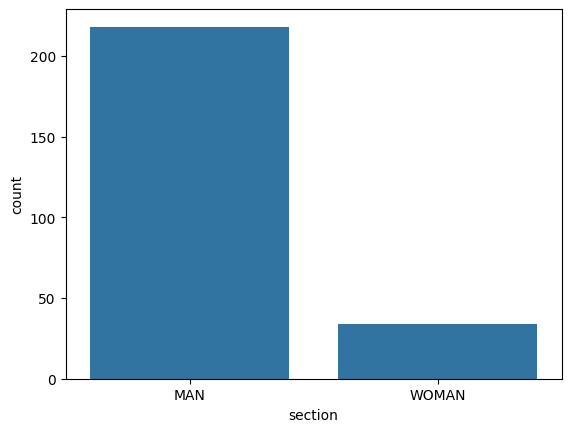

In [61]:
sns.countplot(x="section",data=df)

Se puede evidenciar que la mayor cantidad de ventas se efectuó en la sección de ropa para hombres.

                                 Visualización de las variables 
                                numéricas y tratamiento de outliers                   

<Axes: ylabel='Sales Volume'>

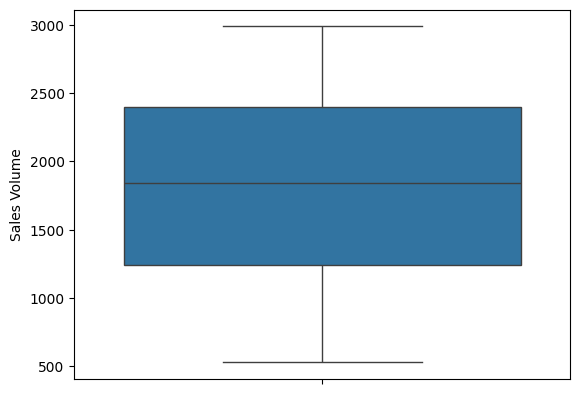

In [62]:
sns.boxplot(y="Sales Volume",data=df)

                                 Correlaciones                  

Esta gráfica muestra una distribución del volumen de ventas, con la mayoría de las observaciones concentradas en el rango entre 1500 y 2500 y una mediana cerca de 2000.

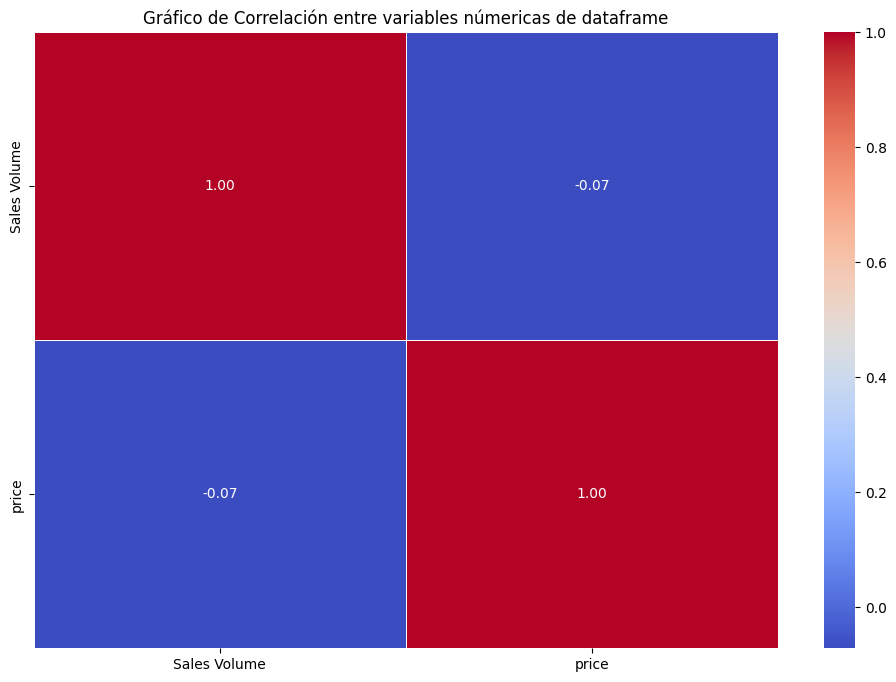

In [63]:
variables_numericas= ["Sales Volume","price"]

matriz_correlacion=df[variables_numericas].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Gráfico de Correlación entre variables númericas de dataframe")
plt.show()

Para la variable dependiente precio podemos ver que las variables independientes que mayor correlacion positiva tiene es Volumen de Ventas.

                            Creación de variables Dummies

En este paso se realiza la conversión de las variables categóricas a numéricas. Es decir, se vuelven 0 y 1 para poder evitar posibles errores

In [64]:
df= pd.get_dummies(df,drop_first=True)
#Pasamos los datos boolenaos de True/Flase a 1/0.
df = df.astype(int)

                             Regresión Lineal Multiple
                                  método rápido
                                

In [65]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sn

X_multi=df.drop(columns=["Sales Volume"],axis=1)
X_multi.head()
y_multi = df["Sales Volume"].astype(float)
X_multi_cons=sn.add_constant(X_multi)
lm_multi=sn.OLS(y_multi, X_multi_cons).fit()
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sales Volume   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     1.174
Date:                Sun, 03 Mar 2024   Prob (F-statistic):              0.254
Time:                        18:56:07   Log-Likelihood:                -1787.3
No. Observations:                 252   AIC:                             3979.
Df Residuals:                      50   BIC:                             4692.
Df Model:                         201                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                               2262.7760    496.670      4.556      0.000    1265.185    3260.367
price                                                 -4.3426      2.348     -1.850      0.070      -9.059       0.373
Product Position_End-cap                              30.9431    196.870      0.157      0.876    -364.482     426.369
Product Position_Front of Store                      -72.4785    205.387     -0.353      0.726    -485.011     340.054
Promotion_Yes                                       -174.2688    186.950     -0.932      0.356    -549.768     201.230
Seasonal_Yes                                        -154.3426    168.464     -0.916      0.364    -492.713     184.027
name_100% LINEN OVERSHIRT                            741.0449    779.876      0.950      0.347    -825.381    2307.471
name_100% WOOL SUIT JACKET                           715.7421    788.616      0.908      0.368    -868.239    2299.723
name_ABSTRACT JACQUARD SWEATER                      -851.4683   1076.718     -0.791      0.433   -3014.120    1311.184
name_ABSTRACT PRINT KNIT T-SHIRT                     269.7087    830.436      0.325      0.747   -1398.271    1937.689
name_ABSTRACT PRINT T-SHIRT                         -796.3482    840.919     -0.947      0.348   -2485.384     892.688
name_ACID WASH DENIM JACKET                          267.5403    791.489      0.338      0.737   -1322.212    1857.292
name_ADHERENT STRIPES SNEAKERS                      1167.4385   1229.943      0.949      0.347   -1302.974    3637.851
name_ALPACA AND WOOL BLEND TIE DYE KNIT SWEATER     -905.1821    665.013     -1.361      0.180   -2240.900     430.536
name_ALPACA BLEND OPEN KNIT SWEATER                 -187.2454    676.197     -0.277      0.783   -1545.427    1170.936
name_ASYMMETRIC CROPPED KNIT SWEATER                1094.6603    664.875      1.646      0.106    -240.780    2430.101
name_ASYMMETRICAL WOOL AND SILK BLEND SWEATER       1195.5132    664.454      1.799      0.078    -139.082    2530.109
name_BAGGY BELTED JEANS                             -318.9552    620.567     -0.514      0.610   -1565.400     927.490
name_BAGGY FIT JEANS                                -182.2231    464.688     -0.392      0.697   -1115.577     751.131
name_BAGGY FIT JEANS LIMITED EDITION                 348.8927    624.995      0.558      0.579    -906.446    1604.232
name_BASIC 100% WOOL SWEATER                         733.9054    667.632      1.099      0.277    -607.073    2074.884
name_BASIC FOIL KNIT SWEATER                         720.7682    672.453      1.072      0.289    -629.893    2071.429
name_BASIC HEAVYWEIGHT T-SHIRT                       -24.7008    829.401     -0.030      0.976   -1690.601  

El modelo de regresión tiene un problema de multicolinealidad, sugiriendo la presencia de un número considerable de variables independientes en comparación con las observaciones disponibles (252), lo que puede indicar una alta correlación entre algunas de ellas. Para abordar este problema, se puede realizar una reducción del número de variables independientes mediante el análisis de componentes principales (PCA) o aumentar la recopilación de datos para mejorar el tamaño de la muestra en relación con las variables independientes. Además, el bajo R-cuadrado ajustado (0.123) indica que las variables en el modelo explican solo una pequeña parte de la variabilidad en las ventas de Zara, mientras que el alto p-valor del estadístico F del modelo (0.254) sugiere que el modelo en su conjunto puede no ser significativo. Esto sugiere la necesidad de considerar otras variables como, por ejemplo, la ubicación de la tienda, el perfil demográfico de los clientes, la competencia local, las estrategias de precios y la disponibilidad de productos, para comprender mejor el comportamiento del volumen de ventas de la empresa.

### BASE DE DATOS
#### Xontoloyo. (s/f). Data Penjualan Zara. Kaggle. Recuperado de https://www.kaggle.com/datasets/xontoloyo/data-penjualan-zara